# Crime Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sql_functions import get_engine
from sql_functions import get_dataframe

## Import

In [4]:
crime_bor_mon = get_dataframe(f'SELECT * FROM capstone_crime_nerds.borough_total_monthly_crimes_type')
crime_bor_mon.head()

,month,year,borough,crime_type,count
0,1.0,2006.0,Bronx,Felony,2532
1,1.0,2006.0,Bronx,Misdemeanor,5461
2,1.0,2006.0,Bronx,Violation,1328
3,1.0,2007.0,Bronx,Felony,2592
4,1.0,2007.0,Bronx,Misdemeanor,5955


In [5]:
nyc_unempl = get_dataframe(f'SELECT * FROM capstone_crime_nerds.unemployment_nyc')
nyc_unempl.head()

,year,month,laborforce,emp,unemp,unemprate,date,borough
0,2024,1,603800,567500,36300,6.0,2024-01-01,Bronx
1,2024,2,611800,573800,38000,6.2,2024-02-01,Bronx
2,2024,3,613000,577900,35100,5.7,2024-03-01,Bronx
3,2023,1,607200,561500,45700,7.5,2023-01-01,Bronx
4,2023,2,612800,566900,45900,7.5,2023-02-01,Bronx


In [6]:
#Including new column (day) to convert to datetime
crime_bor_mon_d = crime_bor_mon
crime_bor_mon_d['day'] = 1

#Inserting Date
crime_bor_mon_d['date'] = pd.to_datetime(crime_bor_mon_d[['year', 'month', 'day']], format="%y/%m")

crime_bor_mon_d.head()

,month,year,borough,crime_type,count,day,date
0,1.0,2006.0,Bronx,Felony,2532,1,2006-01-01
1,1.0,2006.0,Bronx,Misdemeanor,5461,1,2006-01-01
2,1.0,2006.0,Bronx,Violation,1328,1,2006-01-01
3,1.0,2007.0,Bronx,Felony,2592,1,2007-01-01
4,1.0,2007.0,Bronx,Misdemeanor,5955,1,2007-01-01


In [8]:
crime_unempl = crime_bor_mon_d.merge(nyc_unempl, how= "inner", on=["date", 'borough'])
crime_unempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month_x     3240 non-null   float64       
 1   year_x      3240 non-null   float64       
 2   borough     3240 non-null   object        
 3   crime_type  3240 non-null   object        
 4   count       3240 non-null   int64         
 5   day         3240 non-null   int64         
 6   date        3240 non-null   datetime64[ns]
 7   year_y      3240 non-null   int64         
 8   month_y     3240 non-null   int64         
 9   laborforce  3240 non-null   int64         
 10  emp         3240 non-null   int64         
 11  unemp       3240 non-null   int64         
 12  unemprate   3240 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 329.2+ KB


In [9]:
crime_unempl.head()

,month_x,year_x,borough,crime_type,count,day,date,year_y,month_y,laborforce,emp,unemp,unemprate
0,1.0,2006.0,Bronx,Felony,2532,1,2006-01-01,2006,1,507000,469700,37300,7.4
1,1.0,2006.0,Bronx,Misdemeanor,5461,1,2006-01-01,2006,1,507000,469700,37300,7.4
2,1.0,2006.0,Bronx,Violation,1328,1,2006-01-01,2006,1,507000,469700,37300,7.4
3,1.0,2007.0,Bronx,Felony,2592,1,2007-01-01,2007,1,510800,474600,36200,7.1
4,1.0,2007.0,Bronx,Misdemeanor,5955,1,2007-01-01,2007,1,510800,474600,36200,7.1


In [12]:
crime_unempl.drop(['month_x', 'year_x', 'month_y', 'year_y', 'day'], axis=1, inplace= True)
crime_unempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   borough     3240 non-null   object        
 1   crime_type  3240 non-null   object        
 2   count       3240 non-null   int64         
 3   date        3240 non-null   datetime64[ns]
 4   laborforce  3240 non-null   int64         
 5   emp         3240 non-null   int64         
 6   unemp       3240 non-null   int64         
 7   unemprate   3240 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 202.6+ KB


In [15]:
crime_unempl.head()

,borough,crime_type,count,date,laborforce,emp,unemp,unemprate
0,Bronx,Felony,2532,2006-01-01,507000,469700,37300,7.4
1,Bronx,Misdemeanor,5461,2006-01-01,507000,469700,37300,7.4
2,Bronx,Violation,1328,2006-01-01,507000,469700,37300,7.4
3,Bronx,Felony,2592,2007-01-01,510800,474600,36200,7.1
4,Bronx,Misdemeanor,5955,2007-01-01,510800,474600,36200,7.1


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py

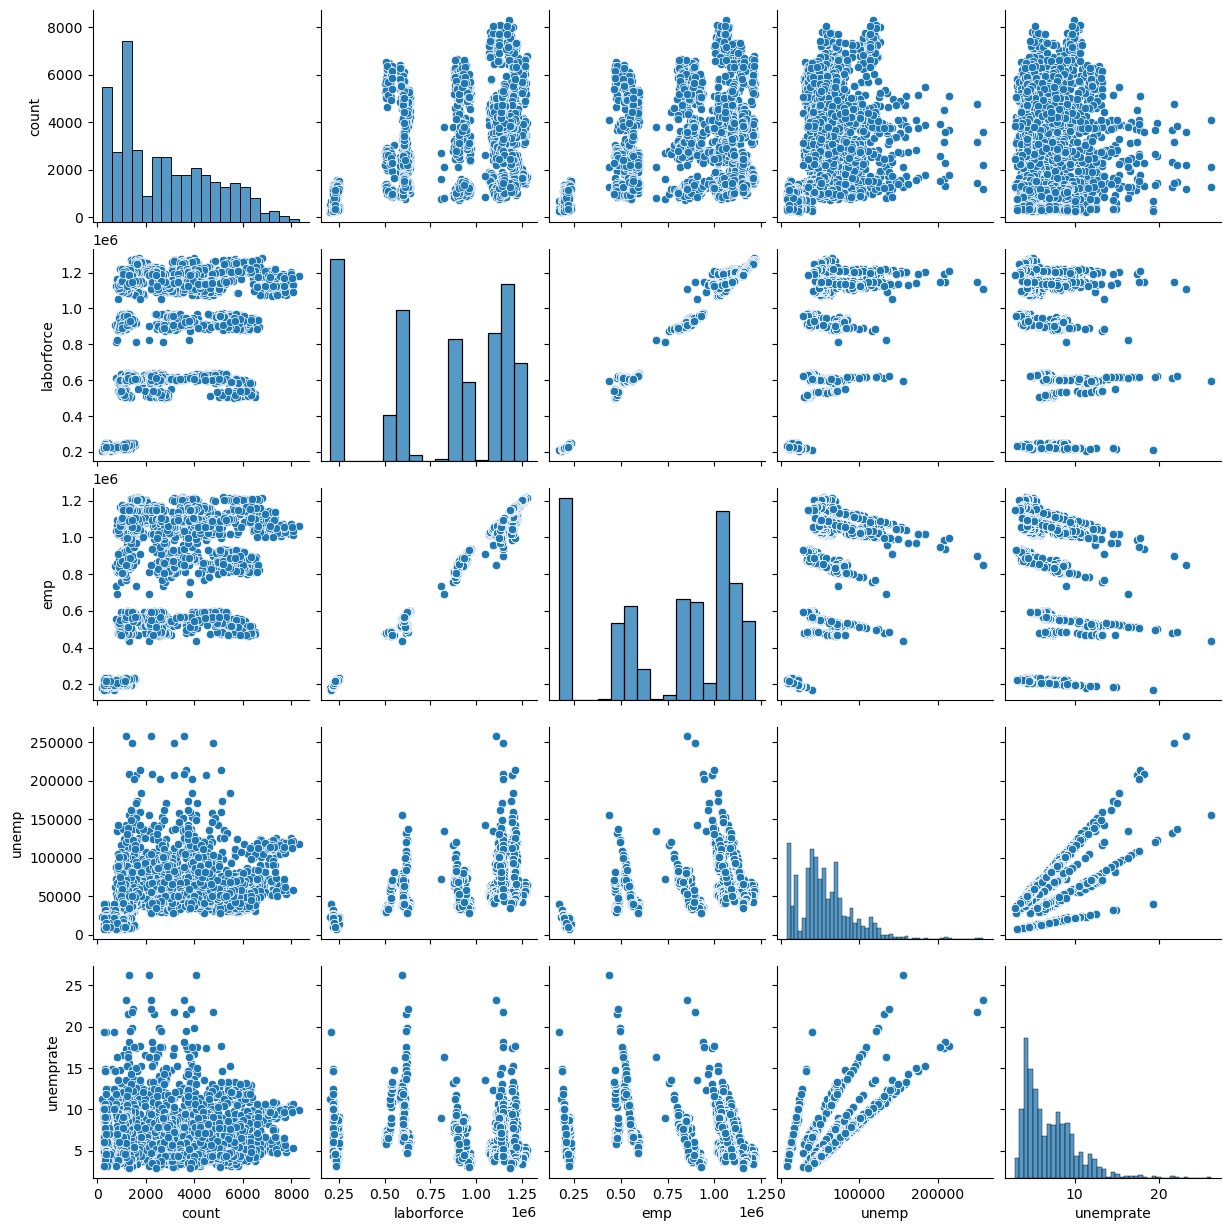

In [13]:
sns.pairplot(crime_unempl);

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


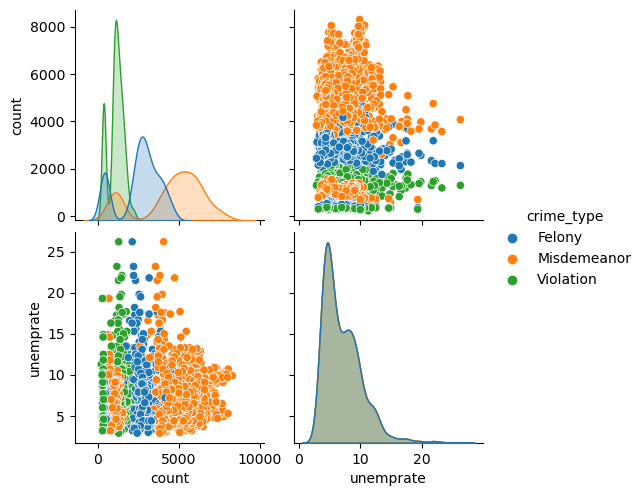

In [16]:
# Create a pairplot
sns.pairplot(data=crime_unempl, vars=['count', 'unemprate'], kind='scatter', diag_kind='kde', hue='crime_type')

# Show the plot
plt.show()


## Import Crime Data Offence Category

In [17]:
crime_offence = get_dataframe(f'SELECT * FROM capstone_crime_nerds.borough_total_monthly_offense_category')
crime_offence.head()

,month,year,borough,offense_category,count
0,1.0,2006.0,Bronx,Children Related,3
1,1.0,2006.0,Bronx,Drug-Related,949
2,1.0,2006.0,Bronx,Financial,89
3,1.0,2006.0,Bronx,Gambling,3
4,1.0,2006.0,Bronx,Kidnapping,12


In [18]:
#Including new column (day) to convert to datetime
crime_offence_d = crime_offence
crime_offence_d['day'] = 1

#Inserting Date
crime_offence_d['date'] = pd.to_datetime(crime_offence_d[['year', 'month', 'day']], format="%y/%m")

crime_offence_d.head()

,month,year,borough,offense_category,count,day,date
0,1.0,2006.0,Bronx,Children Related,3,1,2006-01-01
1,1.0,2006.0,Bronx,Drug-Related,949,1,2006-01-01
2,1.0,2006.0,Bronx,Financial,89,1,2006-01-01
3,1.0,2006.0,Bronx,Gambling,3,1,2006-01-01
4,1.0,2006.0,Bronx,Kidnapping,12,1,2006-01-01


In [19]:
crime_offence_unempl = crime_offence_d.merge(nyc_unempl, how= "inner", on=["date", 'borough'])
crime_offence_unempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12772 entries, 0 to 12771
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month_x           12772 non-null  float64       
 1   year_x            12772 non-null  float64       
 2   borough           12772 non-null  object        
 3   offense_category  12772 non-null  object        
 4   count             12772 non-null  int64         
 5   day               12772 non-null  int64         
 6   date              12772 non-null  datetime64[ns]
 7   year_y            12772 non-null  int64         
 8   month_y           12772 non-null  int64         
 9   laborforce        12772 non-null  int64         
 10  emp               12772 non-null  int64         
 11  unemp             12772 non-null  int64         
 12  unemprate         12772 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 1.3+ MB


In [20]:
crime_offence_unempl.drop(['month_x', 'year_x', 'month_y', 'year_y', 'day'], axis=1, inplace= True)
crime_offence_unempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12772 entries, 0 to 12771
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   borough           12772 non-null  object        
 1   offense_category  12772 non-null  object        
 2   count             12772 non-null  int64         
 3   date              12772 non-null  datetime64[ns]
 4   laborforce        12772 non-null  int64         
 5   emp               12772 non-null  int64         
 6   unemp             12772 non-null  int64         
 7   unemprate         12772 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 798.4+ KB


In [26]:
crime_offence_unempl.head()

,borough,offense_category,count,date,laborforce,emp,unemp,unemprate
0,Bronx,Children Related,3,2006-01-01,507000,469700,37300,7.4
1,Bronx,Drug-Related,949,2006-01-01,507000,469700,37300,7.4
2,Bronx,Financial,89,2006-01-01,507000,469700,37300,7.4
3,Bronx,Gambling,3,2006-01-01,507000,469700,37300,7.4
4,Bronx,Kidnapping,12,2006-01-01,507000,469700,37300,7.4


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py

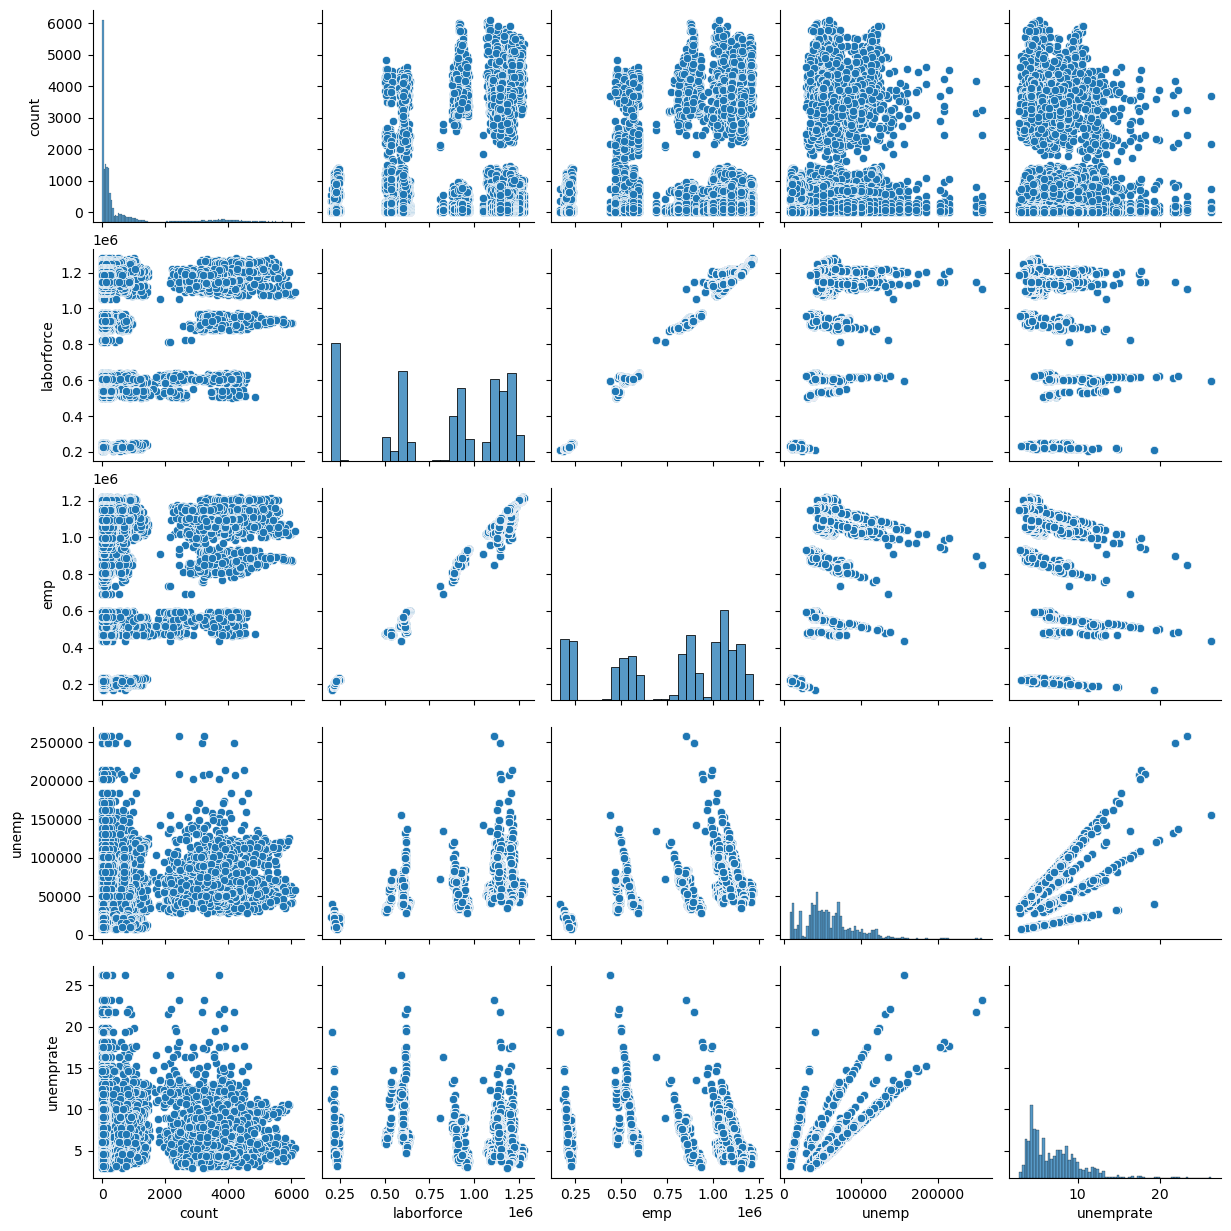

In [21]:
sns.pairplot(crime_offence_unempl);

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


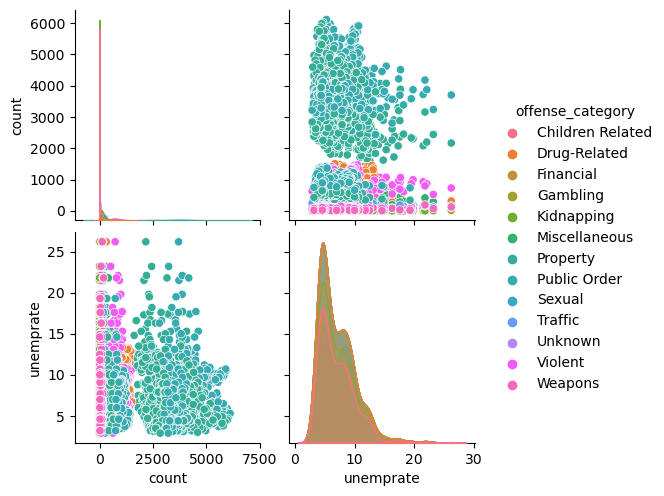

In [23]:
# Create a pairplot
sns.pairplot(data=crime_offence_unempl, vars=['count', 'unemprate'], kind='scatter', diag_kind='kde', hue='offense_category')

# Show the plot
plt.show()

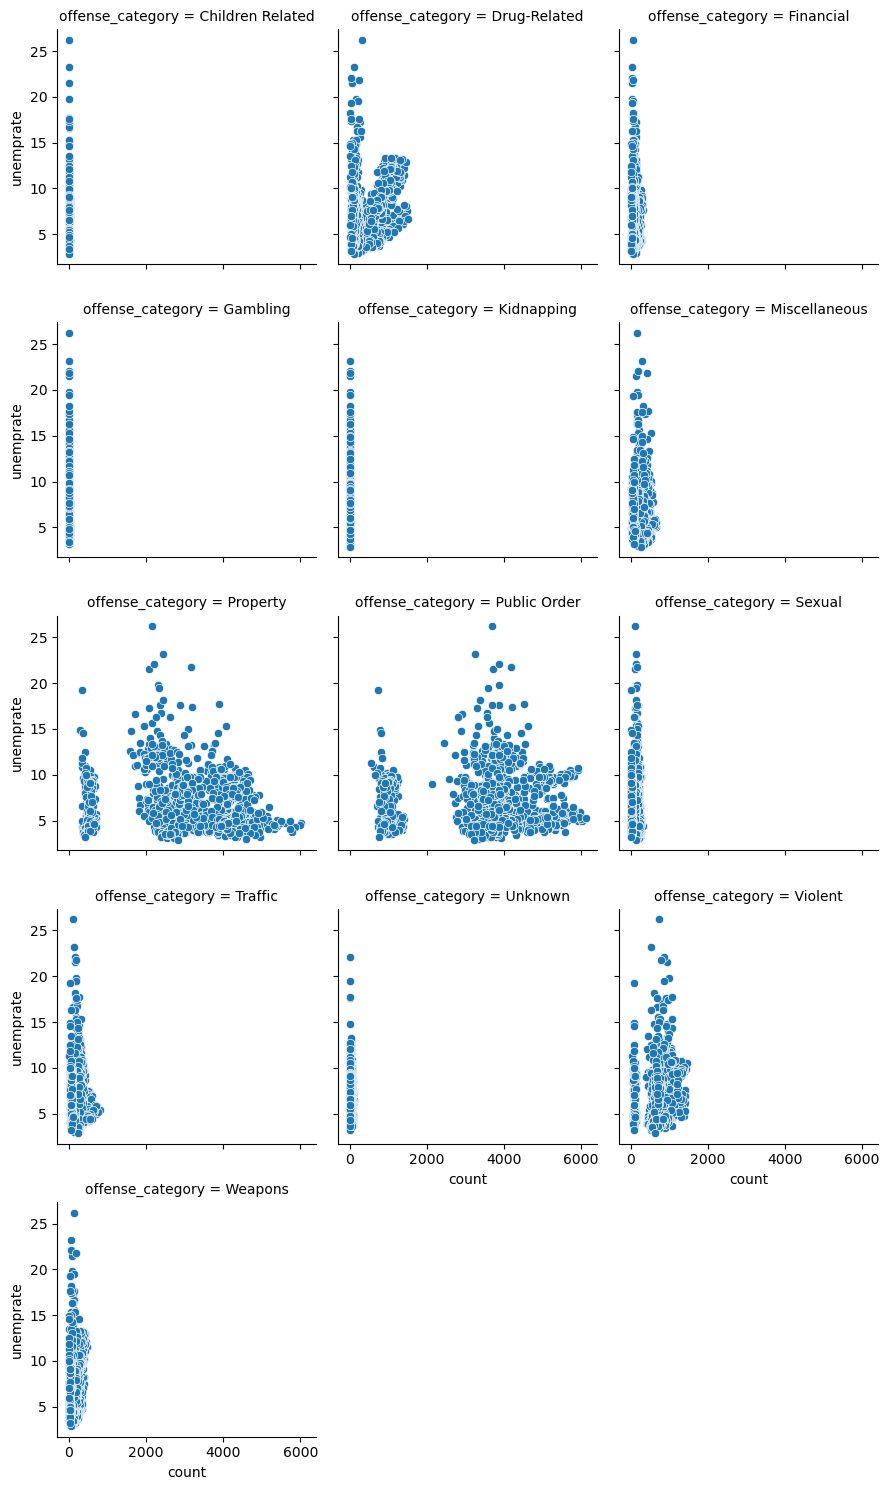

In [25]:
# Create a FacetGrid with offence categories as columns
g = sns.FacetGrid(crime_offence_unempl, col="offense_category", col_wrap=3)
g.map(sns.scatterplot, "count", "unemprate")
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Drug Related

In [30]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data = crime_offence_unempl[crime_offence_unempl['offense_category'] == 'Drug-Related']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
correlation_coefficient = drug_data['unemprate'].corr(drug_data['count'])

print("Correlation coefficient between Drug-Related offenses and Unemployment Rate:", correlation_coefficient)


Correlation coefficient between Drug-Related offenses and Unemployment Rate: 0.20890420649591543


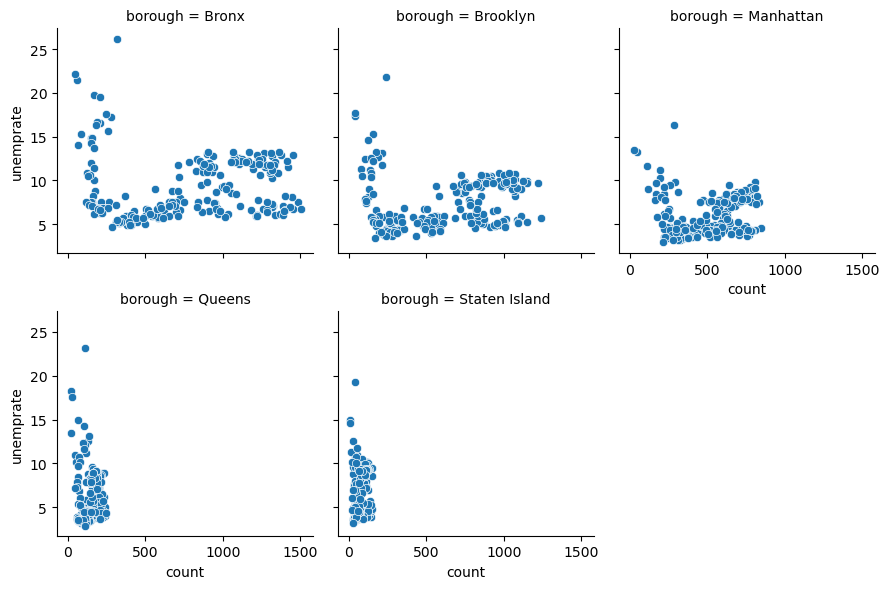

In [31]:
# Create a FacetGrid with offence categories as columns
g = sns.FacetGrid(drug_data, col="borough", col_wrap=3)
g.map(sns.scatterplot, "count", "unemprate")
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Correlation Bronx

In [34]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data_bronx = drug_data[drug_data['borough'] == 'Bronx']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
corr_c_bronx = drug_data_bronx['unemprate'].corr(drug_data_bronx['count'])

print("Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate:", corr_c_bronx)

Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate: 0.02787795624066325


#### Correlation Brooklyn

In [35]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data_brook = drug_data[drug_data['borough'] == 'Brooklyn']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
corr_c_brook = drug_data_brook['unemprate'].corr(drug_data_brook['count'])

print("Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate:", corr_c_brook)

Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate: 0.10670495566347324


#### Correlation Manhattan

In [36]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data_man = drug_data[drug_data['borough'] == 'Manhattan']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
corr_c_man = drug_data_man['unemprate'].corr(drug_data_man['count'])

print("Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate:", corr_c_man)

Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate: 0.08152840982966032


#### Correlation Queens

In [37]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data_que = drug_data[drug_data['borough'] == 'Queens']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
corr_c_que = drug_data_que['unemprate'].corr(drug_data_que['count'])

print("Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate:", corr_c_que)

Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate: -0.13228419247555398


#### Correlation Staten Island

In [38]:
# Filter the DataFrame for the offense category 'Drug-Related'
drug_data_sis = drug_data[drug_data['borough'] == 'Staten Island']

# Calculate the correlation coefficient between 'count' of Drug-Related offenses and 'unemprate'
corr_c_sis = drug_data_sis['unemprate'].corr(drug_data_sis['count'])

print("Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate:", corr_c_sis)

Correlation coefficient between Drug-Related offenses in Bronx and Unemployment Rate: 0.09447043233254818
